DATA : https://www.kaggle.com/datasets/yasinkaanyiit/heart-disease-prediction

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
DATA_PATH="framingham.csv"
dataset=pd.read_csv(DATA_PATH)
dataset.rename(columns ={'male':'Sex_male'}, inplace = True)
dataset.drop(['education'], inplace = True, axis = 1)
dataset.dropna(axis = 0, inplace = True)
dataset

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [6]:
x=np.asarray(dataset[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose']])
y=np.asarray(dataset['TenYearCHD'])
x
y

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=0.3)


/tmp/ipykernel_1702/3292856729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD' , data=dataset,palette='BuGn_r')


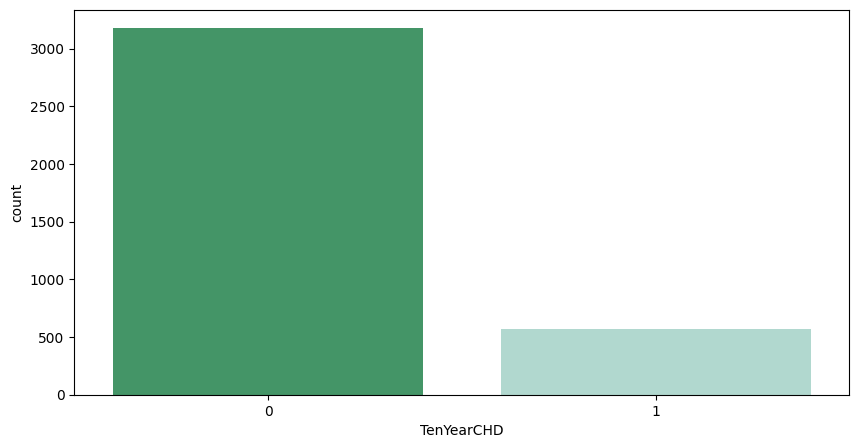

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x='TenYearCHD' , data=dataset,palette='BuGn_r')
plt.show()

In [9]:
#LogisticRegression
logisticRegression=LogisticRegression()
logisticRegression.fit(x_train, y_train)
y_pred=logisticRegression.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
accuracy_score(y_test,y_pred)


0.8490230905861457

In [11]:
confusionMatrix=confusion_matrix(y_test,y_pred)
confusissionMatrix=pd.DataFrame(data=confusionMatrix,columns=['Predicted:0', 'Predicted:1'],index=['Actual:0','Actual:1'])
print(confusissionMatrix)


          Predicted:0  Predicted:1
Actual:0          942            9
Actual:1          161           14


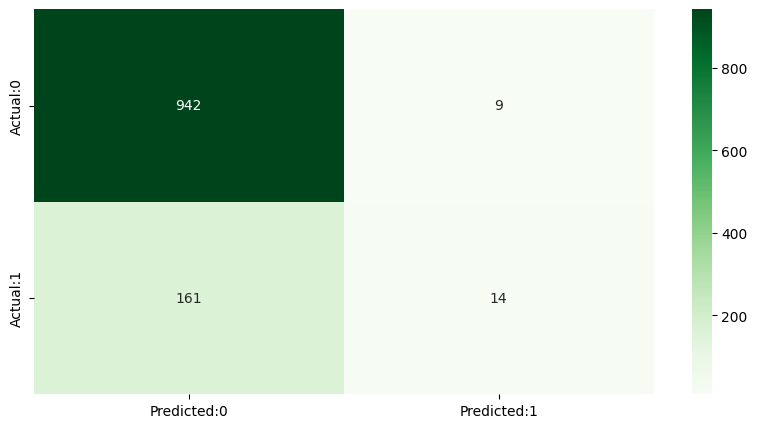

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(confusissionMatrix,annot=True,fmt='d',cmap='Greens')
plt.show()

In [13]:
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126

